C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 0.0041 - val_loss: 4.8169e-04
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 2.0540e-04 - val_loss: 3.1442e-04
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 1.2168e-04 - val_loss: 1.3155e-04
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 1.3294e-04 - val_loss: 5.0262e-04
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 1.2795e-04 - val_loss: 4.8231e-04
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 2.0207e-04 - val_loss: 1.7953e-04
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 9.3745e-05 - val_loss: 0.0012
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 2.2425e-04 - val_loss: 1.1085e-04
Epoch 9/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 1.0184e-04 - val_loss: 3.8212e-04
Epoch 10/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 1.5277e-04 - val_loss: 2.8221e-04
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step


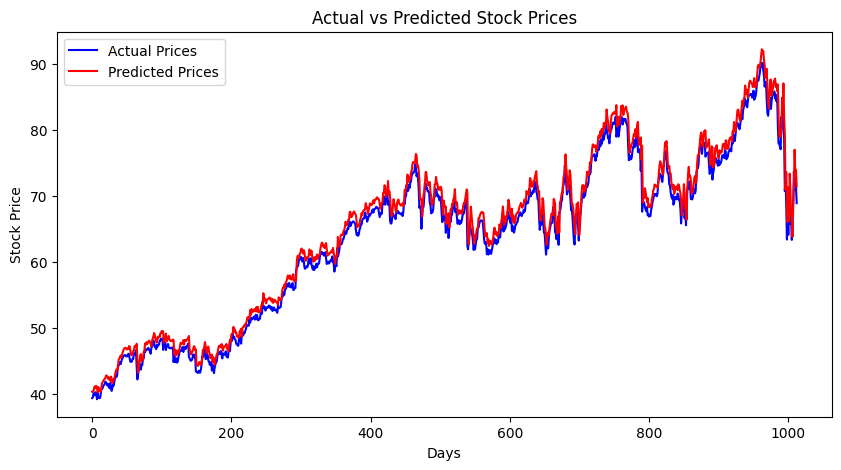

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load stock dataset from CSV
file_path = "A.csv" 
data_df = pd.read_csv(file_path)

# Assuming 'Close' column contains stock prices (modify if needed)
data = data_df['Close'].dropna().values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create sequences for time series forecasting
sequence_length = 60  # Use last 60 days to predict next day
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, sequence_length)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build SimpleRNN Model
model = keras.Sequential([
    layers.SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    layers.SimpleRNN(50, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
epochs = 10
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual Prices', color='blue')
plt.plot(y_pred_inv, label='Predicted Prices', color='red')
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.title("Actual vs Predicted Stock Prices")
plt.show()